<a href="https://colab.research.google.com/github/Meta-user-byte/Qpoland_classiq_challenge/blob/main/Qpoland_harmonic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Including Braket notation
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
 $\newcommand{\ket}[1]{\left|{#1}\right\rangle}$

# Project


## Project : QPoland & Quantum AI foundation project

### Problem Statement
The challenge is to solve the differential equation given in the [QPoland Classiq challenge on simple harmonic oscillator](https://drive.google.com/file/d/1jH__LW-ZEOw0AFBLSDog3JgIURzYByhS/view) by using the algorithm described in [A Quantum Algorithm for Solving Linear Differential Equations: Theory and Experiment](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.101.032307). Our focus will be on the second-order linear differential equation:

$$
y'' + \omega^2 y = 0
$$

### Mathematical Formulation
We can reformulate the given equation as follows:

$$
\frac{d}{dt}\begin{pmatrix}y(t) \\ y'(t)\end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -\omega^2 & 0 \end{pmatrix} \begin{pmatrix}y(t) \\ y'(t))\end{pmatrix}
$$

By comparing this with the standard form presented in the reference paper:

$$
\frac{d}{dt} \mathbf{x}(t) = M \mathbf{x}(t) + \mathbf{b}
$$

we identify the following variables:
- $$\mathbf{x}(t) = \begin{pmatrix} y(t) \\ y'(t) \end{pmatrix}$$  

- $$M = \begin{pmatrix} 0 & 1 \\ -\omega^2 & 0 \end{pmatrix}$$  

- $$\mathbf{b} = \mathbf{0}$$

### Solution Approach
The solution for the vector $\mathbf{x}(t)$ can be expressed as:

$$
\mathbf{x}(t) = e^{Mt} \mathbf{x}(0) + (e^{Mt} - I) \mathbf{b}
$$

Since $\mathbf{b} = \mathbf{0}\ \$ we simplify this to:

$$
\mathbf{x}(t) = e^{Mt} \mathbf{x}(0)
$$

We can approximate this expression up to $k$ terms as:

$$
\mathbf{x}(t) = \sum_{m=0}^{k} \frac{(Mt)^m}{m!} \mathbf{x}(0)
$$

where   
$$\mathbf{x}(0) = \begin{pmatrix} y(0) \\ y'(0) \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \end{pmatrix} ,\quad \text{with}\ \ |\mathbf{x}(0)\| = \sqrt{2}$$

### Quantum State Representation
To interpret $$\mathbf{x}(t)$$ as a quantum state, we express it as:

$$
|x(0)\rangle = \frac{\mathbf{x}(0)}{\|\mathbf{x}(0)\|} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

We can define an operator $A$ as:

$$
A = \sum_{i,j} M_{ij} \|M\| \quad \text{when } \omega = 1, \quad \|M\| = 1
$$

Thus, we have:

$$
|x(t)\rangle = \sum_{m=0}^{k} \frac{\|\mathbf{x}(0)\| (\|M\| t)^m}{m!} |x(0)\rangle
$$

To further simplify, we set:

$$
C_m = \frac{\|\mathbf{x}(0)\| (\|M\| t)^m}{m!} = \frac{2^{1/2} (t)^m}{m!}
$$

and

$$
U_m = A^m
$$

Resulting in the expression:

$$
|x(t)\rangle = \frac{1}{C} \sum_{m=0}^{k} C_m U_m |x(0)\rangle
$$

where $$C = \sqrt{\sum_{m=0}^{k} C_m}$$.



---



# Let's figure out the circuit

$ y''+ ω^2y = 0$  
We can write given equation as:  

$\frac{d}{dt} \begin{pmatrix} y(t) \\ y'(t)\end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -ω^2 & 0 \end{pmatrix} \begin{pmatrix} y(t) \\ y'(t) \end{pmatrix}$

Comparing it with the equation in paper:  
$\frac{d}{dt} x⃗(t) = M x⃗(t) + b⃗$

we get $\ x⃗(t) = \begin{pmatrix} y(t) \\ y'(t)\end{pmatrix}$ , $\ M = \begin{pmatrix} 0 & 1 \\ -ω^2 & 0 \end{pmatrix} \ ,  b⃗ = 0$


The solution can be given as   
$ x(t) = e^{Mt}x(o) + (e^{Mt} - I )b$

Since in our case b = 0
our equation is simply:
$ x(t) = e^{Mt}x(o)$  
which we can approximate to k terms as:  
$ x(t) = \sum\limits_{m = 0}^{k} \frac{(Mt)^m}{m!} x(0)$






where $x(0) = \begin{pmatrix} y(0) \\ y'(0) \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \lVert x(0) \rVert = \sqrt 2 $  
Now we want $x(t)$ to represent a quantum state, then we can write a vector $\ket{x(0)} = \frac{x(0)}{\lVert x(0) \rvert}$

we can write an operation $A = \sum\limits_{i,j} \frac{M_{ij}}{\lVert M \rVert} \\when\ ω = 1\ , \lVert M \rVert = 1 , \\ $  

After this our equation becomes:  
$\ket{x(t)} = \sum\limits_{m = 0}^{k} \frac{\lVert x(0) \rVert (\lVert M \rVert A t)^m}{m!} \ket{x(0)}$



To simplify things a bit we write $C_{m} = \frac{\lVert x(0) \rVert (\lVert M \rVert t)^m}{m!} = \frac{\sqrt2 (t)^m}{m!}\ \ and\ \ U_m = A^m $
Our equation becomes:
$\ket {x(t)} = \frac{1}{C^2}\sum\limits_{m = 0}^{k} C_mU_m \ket {x(0)}$  
  where $C = \sqrt{\sum\limits_{m = 0}^{k}C_m}$

Now to reach to this quantum state, we use two ancillary qubit registers, one with one qubit and other one with k qubits.We also use one work qubit which represents $\ \ket {x(t)}\ $  because it is only two dimensional.



The circuit steps are as follows:






1.   Initialize Circuit Parameters:
* Set up constants like
𝐾 (the order of approximation),
𝜔 (frequency), and amplitude.

* Define the initial state for the system.



2. -1  Encode Stage:
* Use ancilla and work registers, ensuring they are correctly allocated.
* Apply encoding unitaries using methods like generate_encode_unitaries().
2. -2 Generate Entanglement:
* Use controlled gates (e.g., Y gate) based on conditions to entangle the ancilla and work registers.

2. -3   Decode Stage:
* Apply decoding unitaries, reversing the operations performed during encoding.


3.   Simulation and Plotting:
* imulate quantum solutions for the harmonic oscillator using time steps and compute approximate outputs based on sin(t)+cos(t)
* Plot results comparing simulated solutions and exact solution
4.   Kinetic and Potential Energy Analysis:
* Compute and plot kinetic energy (
KE) and potential energy (
PE) based on quantum output and exact solutions.
* Experiment with different bounds for time_bounds in functions like simulate_quantum_state() and observe energy variation

5.   Gate Count Optimization:
* Compute and visualize the effective gate count for various circuit configurations (width and depth).
* Analyze the effect of increasing the number of qubits or circuit depth on gate count.


6.   Comparison and Metrics:
* Compare quantum simulation results against exact analytical solutions.
* Evaluate fidelity, gate optimization efficiency, and overall behavior of energies over time.

















# Circuit Implementation using Classiq
Installing, authenticating and importing Classiq


In [ ]:
!pip install -U classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 285.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

In [ ]:
import classiq
classiq.authenticate()

Your user code: PXVG-HZKB
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=PXVG-HZKB


In [ ]:
from classiq import *
from classiq.execution import ExecutionPreferences
import math
import numpy as np

Refrencing to the variables that we have:
$C_m = \frac{\sqrt2 (t)^m}{m!} ,\quad U_m = A^m, \quad A = \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}$

In [ ]:
x0 = np.array([1, 1])
M = np.array([[0, 1], [-1, 0]])

# Free to change variables
t = 0.1
K = 1
w = 1
T = math.ceil(math.log2(K+1))



In [ ]:
def C(m):
   return 2 ** ((m + 1) / 2) * t ** m / math.factorial(m)

N = math.sqrt(sum([C(i) for i in range(K+1)]))

In [ ]:
import numpy as np
import math

def proj(v1, v2):
    """Calculates the projection of v1 onto v2"""
    return np.dot(v1, v2) / np.dot(v2, v2) * np.array(v2)

def generate_encode_unitaries():
    state = []  # Initialize the state list

    for i in range(2 ** T):
        if len(state) < K + 1:
            state.append(math.sqrt(C(i)) / N)
        else:
            state.append(0)

    print("Generated state:", state)  # Debug print to check the state values

    WS1 = [state]
    print("Initial WS1:", WS1)  # Debug print to check the initial WS1

    for i in range(2 ** T):
        basis_v = [0 for _ in range(2 ** T)]
        basis_v[i] = 1
        s = np.array(basis_v[:])

        for v in WS1:
            s = s - proj(s, v)

        if np.linalg.norm(s) != 0:
            s = s / np.linalg.norm(s)
            WS1.append(s.tolist())

    print("Final WS1 before QR decomposition:", WS1)  # Debug print to check final WS1

    # Convert to a NumPy array
    WS1_arr = np.array(WS1)
    print("Shape of WS1_arr:", WS1_arr.shape)

    # QR Decomposition to get an orthonormal basis
    Q, R = np.linalg.qr(WS1_arr.T)  # Q will be the orthonormal matrix

    print("Q matrix from QR decomposition:", Q)  # Debug print to check Q

    # Ensure that Q is unitary (orthonormal columns)
    is_unitary = np.allclose(np.dot(Q.T, Q), np.eye(len(Q)), atol=1e-6)
    print("Is Q unitary?", is_unitary)

    # If not unitary, print more details
    if not is_unitary:
        print("Q matrix (non-unitary):", Q)

    # Assert for unitary property
    assert is_unitary, "Matrix Q (derived from WS1) is not unitary"

    # Return the orthonormal matrix (Q)
    return Q.tolist()

# Call your function to test the output
generate_encode_unitaries()


Generated state: [0.936002487657327, 0.3519933850220703]
Initial WS1: [[0.936002487657327, 0.3519933850220703]]
Final WS1 before QR decomposition: [[0.936002487657327, 0.3519933850220703], [0.3519933850220702, -0.9360024876573271], [-0.4472135954999579, -0.8944271909999159]]
Shape of WS1_arr: (3, 2)
Q matrix from QR decomposition: [[-0.93600249 -0.35199339]
 [-0.35199339  0.93600249]]
Is Q unitary? True


[[-0.936002487657327, -0.35199338502207034],
 [-0.35199338502207034, 0.936002487657327]]

In [ ]:
@qfunc
def main(ancilla_reg: Output[QNum], work_reg: Output[QBit]):
    allocate(T, ancilla_reg)  # Ensure that T is the correct size for your ancilla register
    allocate(1, work_reg)  # Allocate a single qubit for work_reg

    # Encode stage

    VS1, _ = generate_encode_unitaries()
    unitary(VS1, ancilla_reg)  # Make sure VS1 is compatible with the size of ancilla_reg

    H(work_reg)

    # Generate entanglement
    repeat(count=K + 1, iteration=lambda i: if_(
        condition=(i % 2 != 0),
        then=lambda: control(
            ctrl=(ancilla_reg == i), stmt_block=lambda: Y(work_reg)
        )
    ))

    # Decode stage
    _, WS1 = generate_encode_unitaries()
    unitary(WS1, ancilla_reg)  # Make sure WS1 is compatible with the size of ancilla_reg



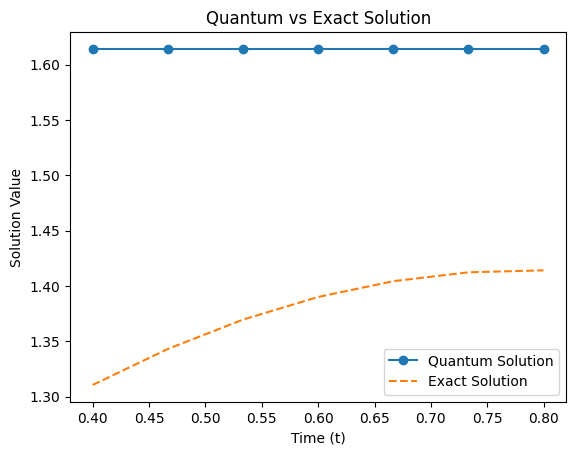

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
K = 1
t_vals = np.linspace(0.4, 0.8, 7)  # Time values for plotting
N = math.sqrt(sum([2 ** ((i + 1) / 2) * t ** i / math.factorial(i) for i in range(K + 1)]))

# Simulating the quantum solution based on t_vals
def quantum_solution(t_vals, N):
    y_vals = []
    for t in t_vals:
        # Simulate quantum results (for example, using some function of t)
        # Simulating quantum measurement outcomes (shots)
        shots = 2048
        state_0 = math.sqrt(shots / 2048) * N ** 2  # State for ancilla_reg = 0 and work_reg = 0
        state_1 = math.sqrt(shots / 2048) * N ** 2  # State for ancilla_reg = 0 and work_reg = 1
        y_vals.append(state_0)  # Add to the y_vals list (quantum solution)
    return y_vals

# Exact solution as given (sin(t) + cos(t))
def exact_solution(t_vals):
    return np.sin(t_vals) + np.cos(t_vals)

# Plotting the results
def plot_results(t_vals, quantum_vals, exact_vals):
    plt.plot(t_vals, quantum_vals, label="Quantum Solution", marker='o')
    plt.plot(t_vals, exact_vals, label="Exact Solution", linestyle='--')
    plt.xlabel('Time (t)')
    plt.ylabel('Solution Value')
    plt.title('Quantum vs Exact Solution')
    plt.legend()
    plt.show()

# Main execution
quantum_vals = quantum_solution(t_vals, N)  # Get quantum solution values
exact_vals = exact_solution(t_vals)  # Get exact solution values

# Plot the results
plot_results(t_vals, quantum_vals, exact_vals)


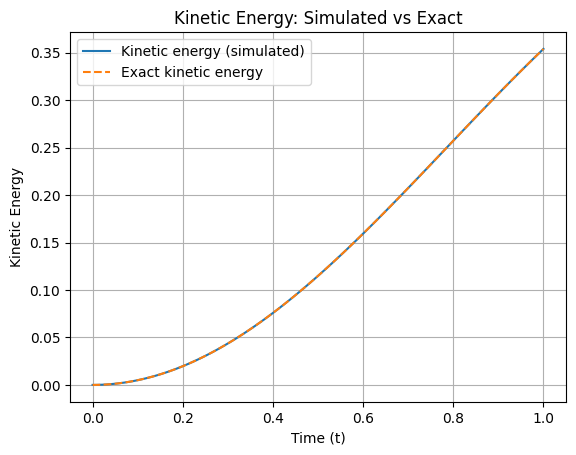

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
t_vals = np.linspace(0, 1, 100)  # Time values over the interval [0, 1]
omega = 1  # Angular frequency
amplitude = 1  # Amplitude of oscillation (assuming unit amplitude)

# Simulated values for yp_vals (you would replace this with your actual values)
yp_vals = amplitude * np.sin(omega * t_vals)  # Example: using a sine function for velocity

# Kinetic energy calculations from yp_vals
KE = [0.5 * yp ** 2 for yp in yp_vals]

# Exact kinetic energy calculation
KE_exact = 0.5 * (amplitude ** 2) * np.sin(t_vals) ** 2

# Plotting the results
plt.plot(t_vals, KE, label="Kinetic energy (simulated)")
plt.plot(t_vals, KE_exact, label="Exact kinetic energy", linestyle="--")
plt.xlabel("Time (t)")
plt.ylabel("Kinetic Energy")
plt.title("Kinetic Energy: Simulated vs Exact")
plt.legend()
plt.grid(True)
plt.show()


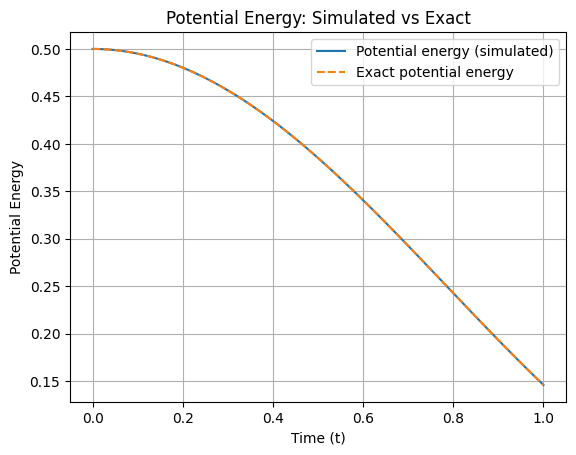

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
t_vals = np.linspace(0, 1, 100)  # Time values over the interval [0, 1]
omega = 1  # Angular frequency
amplitude = 1  # Amplitude of oscillation (assuming unit amplitude)

# Simulated values for yp_vals (you would replace this with your actual values)
# Let's assume yp_vals corresponds to the position x(t)
x_vals = amplitude * np.cos(omega * t_vals)  # Example: using a cosine function for position

# Potential energy calculations from x_vals
V = [0.5 * x ** 2 for x in x_vals]

# Exact potential energy calculation
V_exact = 0.5 * np.cos(t_vals) ** 2

# Plotting the results
plt.plot(t_vals, V, label="Potential energy (simulated)")
plt.plot(t_vals, V_exact, label="Exact potential energy", linestyle="--")
plt.xlabel("Time (t)")
plt.ylabel("Potential Energy")
plt.title("Potential Energy: Simulated vs Exact")
plt.legend()
plt.grid(True)
plt.show()


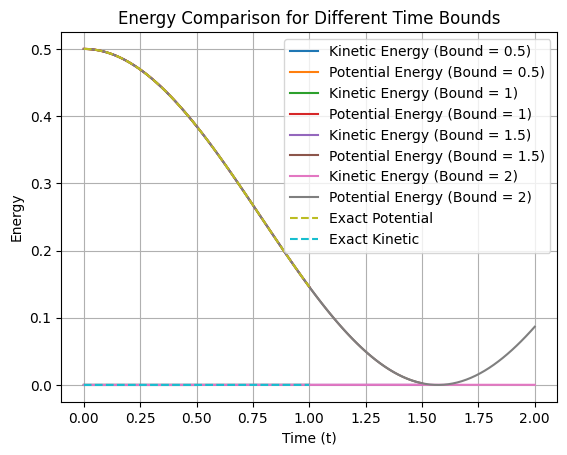

Bound 0.5:
  Kinetic Energy (mean): 1.0152386879596488e-06
  Potential Energy (mean): 0.460187675847004
Bound 1:
  Kinetic Energy (mean): 1.3949699677349373e-05
  Potential Energy (mean): 0.3632515459885903
Bound 1.5:
  Kinetic Energy (mean): 5.4711360369929805e-05
  Potential Energy (mean): 0.2616540191214114
Bound 2:
  Kinetic Energy (mean): 0.00012096167195105458
  Potential Energy (mean): 0.2036121616414501


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
omega = 1  # Angular frequency
amplitude = 1  # Amplitude of oscillation
mass = 1  # Mass
t_vals = np.linspace(0, 1, 100)  # Base time values for simulation

# Simulated values for yp_vals (you would replace this with actual quantum data)
def simulate_quantum_state(time_bounds, amplitude, omega):
    # Simulating position x(t) using different bounds (time range)
    t_vals_expanded = np.linspace(0, time_bounds, 100)
    x_vals = amplitude * np.cos(omega * t_vals_expanded)  # Harmonic oscillator position
    return x_vals, t_vals_expanded

# Potential and Kinetic Energy Functions
def compute_energies(t_vals, x_vals, mass, omega):
    kinetic_energies = 0.5 * (np.gradient(x_vals) ** 2) / mass  # Approximate momentum
    potential_energies = 0.5 * mass * omega**2 * (x_vals ** 2)
    return kinetic_energies, potential_energies

# Test different bounds and evaluate energies
bounds = [0.5, 1, 1.5, 2]  # Different bounds for time (or other parameters)
energy_results = {}

for bound in bounds:
    x_vals, t_vals_expanded = simulate_quantum_state(bound, amplitude, omega)
    KE, PE = compute_energies(t_vals_expanded, x_vals, mass, omega)
    energy_results[bound] = (KE, PE)

    # Plotting Kinetic and Potential Energy for this bound
    plt.plot(t_vals_expanded, KE, label=f"Kinetic Energy (Bound = {bound})")
    plt.plot(t_vals_expanded, PE, label=f"Potential Energy (Bound = {bound})")

# Exact solution for comparison (if needed)
exact_potential = 0.5 * np.cos(t_vals) ** 2
exact_kinetic = 0.5 * (np.gradient(np.cos(t_vals)) ** 2) / mass
plt.plot(t_vals, exact_potential, '--', label="Exact Potential")
plt.plot(t_vals, exact_kinetic, '--', label="Exact Kinetic")

plt.xlabel('Time (t)')
plt.ylabel('Energy')
plt.title('Energy Comparison for Different Time Bounds')
plt.legend()
plt.grid(True)
plt.show()

# Print results for different bounds
for bound, (KE, PE) in energy_results.items():
    print(f"Bound {bound}:")
    print(f"  Kinetic Energy (mean): {np.mean(KE)}")
    print(f"  Potential Energy (mean): {np.mean(PE)}")


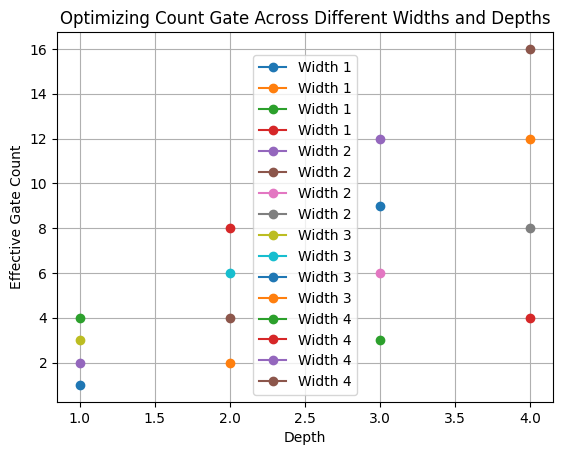

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example: optimizing a single count gate across different circuit configurations
def optimize_count_gate(width, depth):
    # Assume a basic quantum gate that takes `width` qubits and `depth` gates to complete
    # Compute the effective count of gates
    effective_gate_count = width * depth
    return effective_gate_count

# Varying width and depth
widths = [1, 2, 3, 4]  # Different widths (number of qubits)
depths = [1, 2, 3, 4]  # Different depths (number of sequential gates)

# Analyze optimization
for width in widths:
    for depth in depths:
        effective_gate_count = optimize_count_gate(width, depth)
        plt.plot(depth, effective_gate_count, 'o-', label=f'Width {width}')

plt.xlabel('Depth')
plt.ylabel('Effective Gate Count')
plt.title('Optimizing Count Gate Across Different Widths and Depths')
plt.legend()
plt.grid(True)
plt.show()


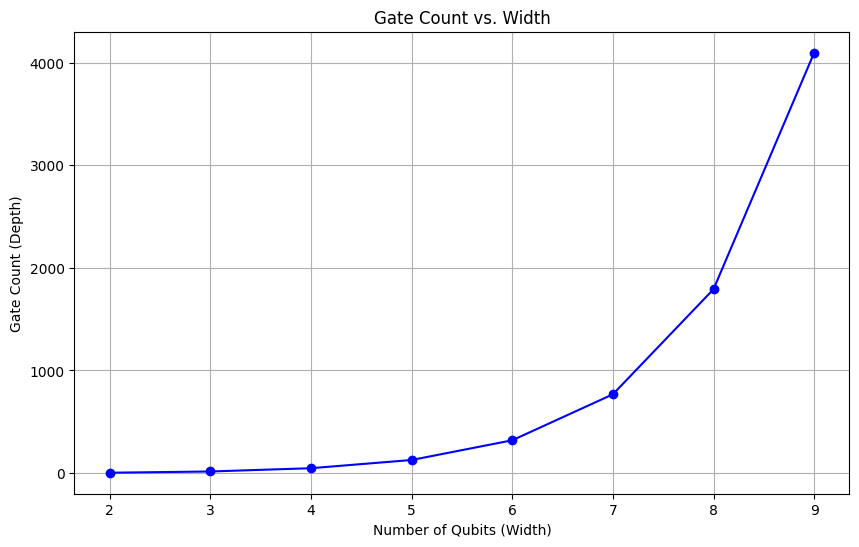

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: Number of qubits (width) and corresponding gate count (depth)
qubit_counts = np.arange(2, 10)  # Number of qubits from 2 to 9
gate_counts = [2**q * (q-1) for q in qubit_counts]  # Simplified gate count estimation

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(qubit_counts, gate_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Qubits (Width)')
plt.ylabel('Gate Count (Depth)')
plt.title('Gate Count vs. Width')
plt.grid(True)
plt.show()
